Ким, М8О-114СВ-24

Лабораторная работа 4.

Восстановление функции распренделения вероятности


1.   Реализовать метод восстановления плотности вероятности двумя способами:
2.   EM-алгоритм
3.   Ядерное сглаживание
    2.   Применить данные методы на любом наборе случайных точек

     
5. Реализовать метод Метрополиса-Гастингса и Гибсона для несимметричного распределения. Применить два метода на основе той функции плотности, которая была восстановлена в прошлом пункте, тем самым получив изначальные точки.
     1. в методе М-Г нарисовать картинку блуждания в случае 3D-функции плотности (на доп баллы)
     2. Сравнить красный и синий набор точек (сгенерированые и исходные) (с помощью Расстояния Кульбака-Лейблера)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KernelDensity

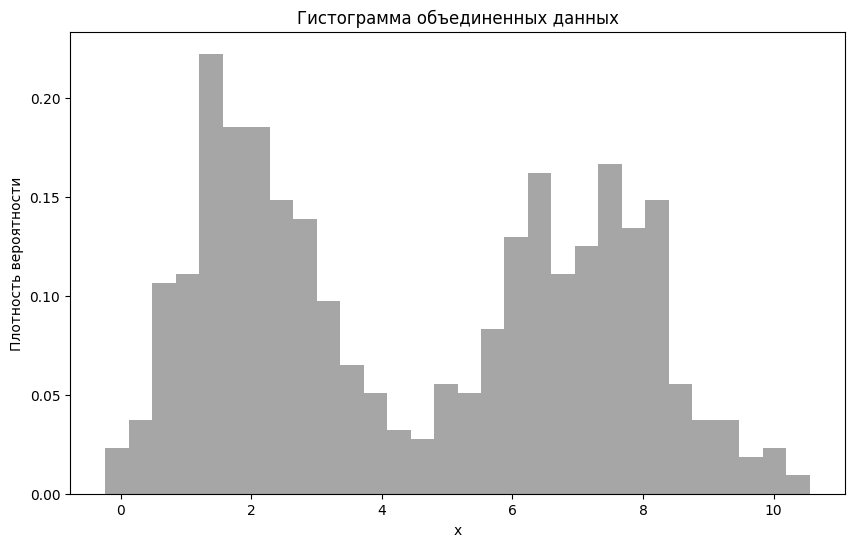

In [ ]:
np.random.seed(11)

np.random.seed(11)

# Генерация данных
data1 = np.random.multivariate_normal(mean=[2, 3], cov=[[1, 0.5], [0.5, 1]], size=300)
data2 = np.random.multivariate_normal(mean=[7, 8], cov=[[1.5, -0.3], [-0.3, 1]], size=300)


data = np.concatenate([data1[:, 0], data2[:, 0]])

plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, alpha=0.7, color='gray')  # Все данные на одном графике
plt.title("Гистограмма объединенных данных")
plt.xlabel("x")
plt.ylabel("Плотность вероятности")
plt.show()

In [ ]:
data

array([[0.62796425, 1.34189125],
       [3.74630499, 2.09298643],
       [2.16699038, 2.84735902],
       ...,
       [7.96322894, 8.75392773],
       [8.99391305, 6.96402178],
       [6.64486721, 8.69068134]])

# EM-алгоритм: Оценка смеси нормальных распределений

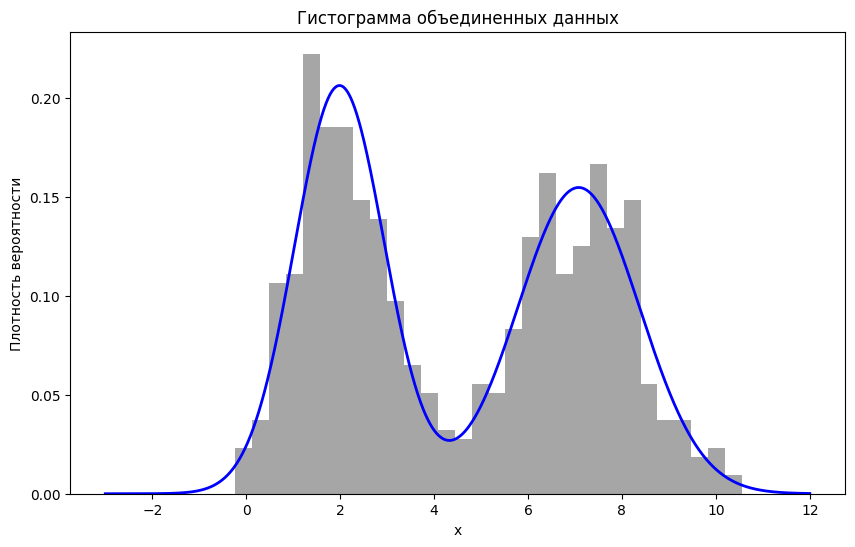

In [ ]:
gmm = GaussianMixture(n_components=2, covariance_type='full')
gmm.fit(data.reshape(-1, 1))
x = np.linspace(-3, 12, 1000).reshape(-1, 1)
gmm_pdf = np.exp(gmm.score_samples(x))

plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, alpha=0.7, color='gray')
plt.plot(x, gmm_pdf, label='EM-Алгоритм', color='b', lw=2)
plt.title("Гистограмма объединенных данных")
plt.xlabel("x")
plt.ylabel("Плотность вероятности")
plt.show()

# plt.figure(figsize=(10, 6))
# plt.hist(data, bins=30, density=True, alpha=0.6, label=['Data 1', 'Data 2', 'Data 3'])
# plt.plot(x, gmm_pdf, label='EM-Алгоритм', color='b', lw=2)
# plt.title('Оценка плотности с использованием EM-алгоритма')
# plt.xlabel('x')
# plt.ylabel('Плотность вероятности')
# plt.legend()
# plt.show()

# Ядерное сглаживание

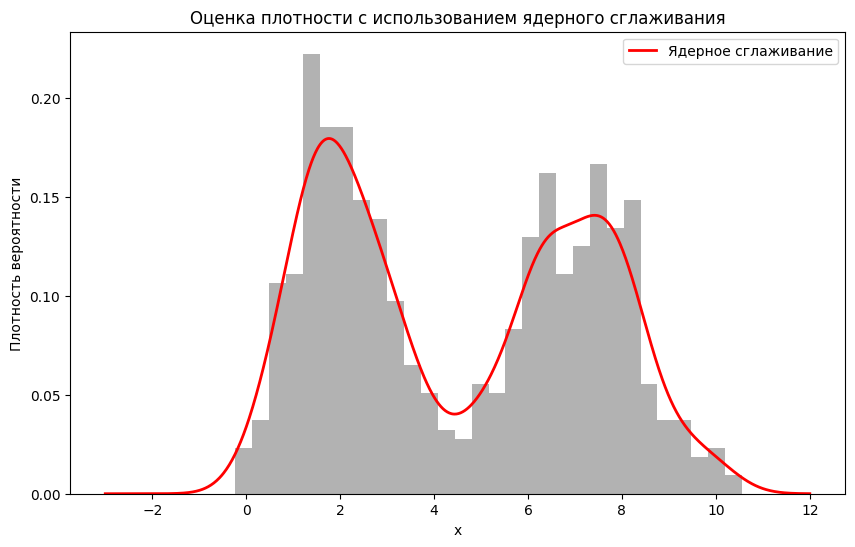

In [ ]:
kde = KernelDensity(kernel='gaussian', bandwidth=0.5)
kde.fit(data.reshape(-1, 1))
kde_pdf = np.exp(kde.score_samples(x))

plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, alpha=0.6, color='gray')
plt.plot(x, kde_pdf, label='Ядерное сглаживание', color='r', lw=2)
plt.title('Оценка плотности с использованием ядерного сглаживания')
plt.xlabel('x')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()

# Визуализация результатов

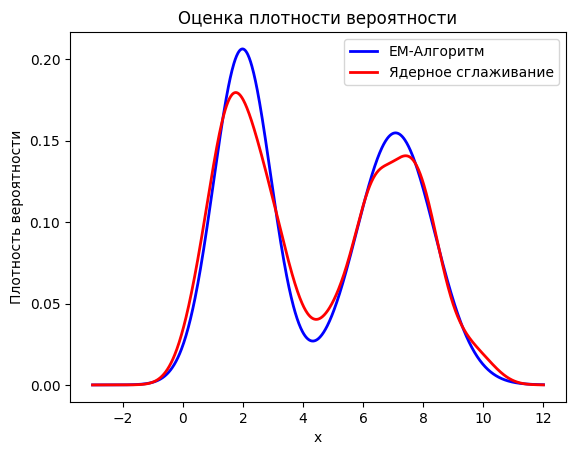

In [ ]:
plt.plot(x, gmm_pdf, label='EM-Алгоритм', color='b', lw=2)
plt.plot(x, kde_pdf, label='Ядерное сглаживание', color='r', lw=2)
plt.legend()
plt.title('Оценка плотности вероятности')
plt.xlabel('x')
plt.ylabel('Плотность вероятности')
plt.show()

# Метод Метрополиса-Гастингса (M-H)

In [ ]:
def metropolis_hastings(target_density, initial_point, n_samples, proposal_std):
    samples = [initial_point]
    current = initial_point
    for _ in range(n_samples):
        proposal = np.random.normal(current, proposal_std)

        acceptance_ratio = target_density(np.array([proposal])) / target_density(np.array([current]))
        acceptance_ratio = min(1, acceptance_ratio[0])

        if np.random.rand() < acceptance_ratio:
            samples.append(proposal)
            current = proposal
        else:
            samples.append(current)
    return np.array(samples)

# Метод Гиббса для (1-мерный)

In [ ]:
def gibbs_sampling(target_density, initial_point, n_samples):
    samples = [target_density]
    current =  np.array(target_density)
    for _ in range(n_samples - 1):
        for i, conditional in enumerate(initial_point):
            current[i] = conditional(*current[:i], *current[i + 1:])
        samples.append(current.copy())
    return np.array(samples)

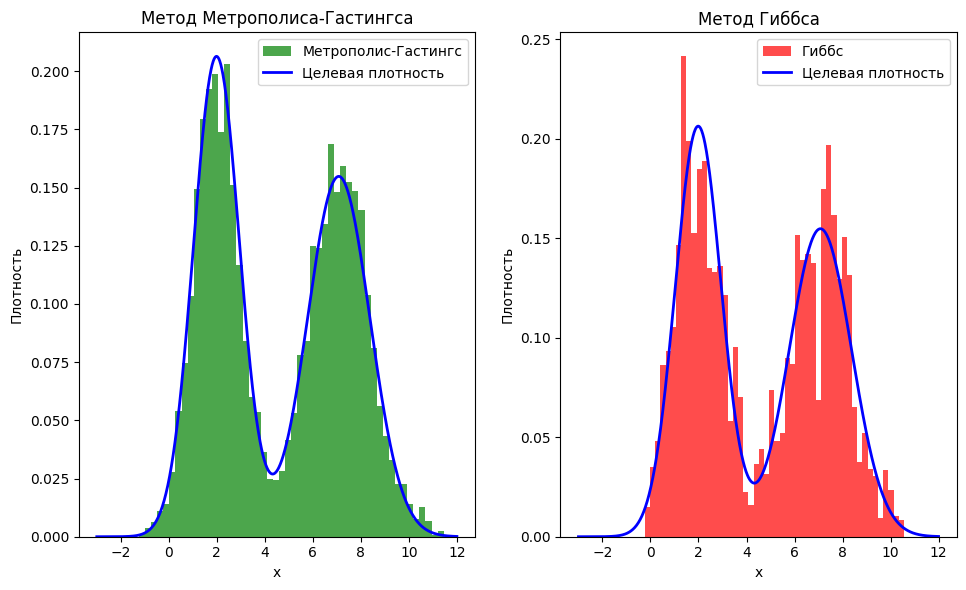

In [ ]:
def target_density(x):
    return np.exp(gmm.score_samples(x.reshape(-1, 1)))

initial_point = data.mean()
n_samples = 10000
proposal_std = 1

mh_samples = metropolis_hastings(target_density, initial_point, n_samples, proposal_std)
gibbs_samples = gibbs_sampling([data.mean()], [lambda: np.random.choice(data)], n_samples)

x = np.linspace(-3, 12, 1000)

plt.figure(figsize=(14, 6))


plt.subplot(1, 3, 2)
plt.hist(mh_samples, bins=50, density=True, alpha=0.7, color='g', label='Метрополис-Гастингс')
plt.plot(x, target_density(x), label='Целевая плотность', color='b', lw=2)
plt.title('Метод Метрополиса-Гастингса')
plt.xlabel('x')
plt.ylabel('Плотность')
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(gibbs_samples, bins=50, density=True, alpha=0.7, color='r', label='Гиббс')
plt.plot(x, target_density(x), label='Целевая плотность', color='b', lw=2)
plt.title('Метод Гиббса')
plt.xlabel('x')
plt.ylabel('Плотность')
plt.legend()

plt.tight_layout()
plt.show()

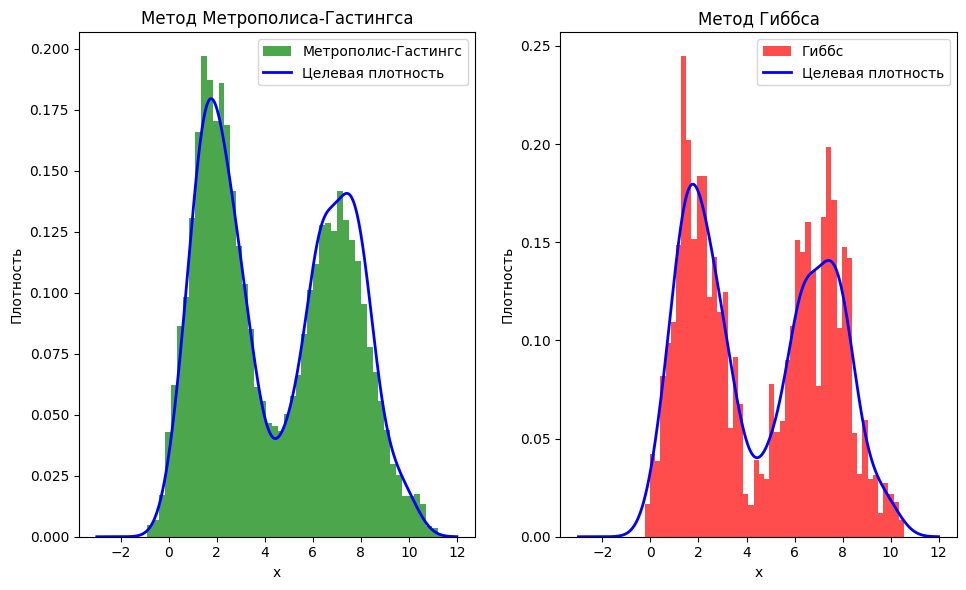

In [ ]:
def target_density(x):
    return np.exp(kde.score_samples(x.reshape(-1, 1)))

initial_point = data.mean()
n_samples = 10000
proposal_std = 1

mh_samples = metropolis_hastings(target_density, initial_point, n_samples, proposal_std)
gibbs_samples = gibbs_sampling([data.mean()], [lambda: np.random.choice(data)], n_samples)

x = np.linspace(-3, 12, 1000)

plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 2)
plt.hist(mh_samples, bins=50, density=True, alpha=0.7, color='g', label='Метрополис-Гастингс')
plt.plot(x, target_density(x), label='Целевая плотность', color='b', lw=2)
plt.title('Метод Метрополиса-Гастингса')
plt.xlabel('x')
plt.ylabel('Плотность')
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(gibbs_samples, bins=50, density=True, alpha=0.7, color='r', label='Гиббс')
plt.plot(x, target_density(x), label='Целевая плотность', color='b', lw=2)
plt.title('Метод Гиббса')
plt.xlabel('x')
plt.ylabel('Плотность')
plt.legend()

plt.tight_layout()
plt.show()